# Ford GoBike Data Exploration
## by (Saud Alfaleh)

## Preliminary Wrangling

>In this investigation, we'll be looking at the data collected by Ford's GoBike program,the system features monthly trip data collected in CSV format, We'll be doing our best to make the most of it.

In [39]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

#### Merging CSV files using os and glob

In [41]:
folder_name = 'dataset_files'
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
df = pd.concat(frames, ignore_index=True)

#### Storing the master data file localy

In [4]:
df.to_csv('ford_gobike_master.csv', index=False)

#### Dataset observation

In [43]:
df_master = pd.read_csv('ford_gobike_master.csv')
print(df_master.shape)
df_master.head()

C:\Users\Saud\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(2506983, 15)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [6]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [7]:
df_master.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [8]:
df_master.duplicated().sum()

0

In [9]:
df_master['bike_share_for_all_trip'].value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

In [10]:
df_master['rental_access_method'].value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

In [11]:
df_master['user_type'].value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

#### Cleaning

In [12]:
df_master_clean = df_master.copy()

In [13]:
#define
#First of all, We need to fix the dtype issue, by specifying the data types:

In [14]:
#Code
df_master_clean['start_time'] = pd.to_datetime(df_master_clean['start_time'])
df_master_clean['end_time'] = pd.to_datetime(df_master_clean['end_time'])

df_master_clean['start_station_id'] = df_master_clean['start_station_id'].astype('str')
df_master_clean['end_station_id'] = df_master_clean['end_station_id'].astype('str')
df_master_clean['bike_id'] = df_master_clean['bike_id'].astype('str')

df_master_clean['user_type'] = df_master_clean['user_type'].astype('category')
df_master_clean['rental_access_method'] = df_master_clean['rental_access_method'].astype('category')

df_master_clean.bike_share_for_all_trip = (df_master_clean.bike_share_for_all_trip == 'Yes')

In [15]:
#Test
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  bool          
 14  rental_access_method     category      
dtypes: bool(1), category(2), datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 236.7+ MB


In [16]:
#define
#Second, We will drop all rows we dont need like start_station_id, start_station_name, end_station_id and end_station_name = null.

In [17]:
#Code
df_master_clean.drop(df_master_clean[df_master_clean['start_station_id'].isnull()].index, inplace = True)
df_master_clean.drop(df_master_clean[df_master_clean['start_station_name'].isnull()].index, inplace = True)
df_master_clean.drop(df_master_clean[df_master_clean['end_station_name'].isnull()].index, inplace = True)
#Test
df_master_clean.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id                 0
start_station_name               0
start_station_latitude           0
start_station_longitude          0
end_station_id                   0
end_station_name                 0
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip          0
rental_access_method       2385400
dtype: int64

In [31]:
df_master

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506978,731,2019-12-28 18:37:29,2019-12-28 18:49:40,NaN,NaN,37.809731,-122.409855,NaN,NaN,37.807573,-122.421681,719651,Subscriber,NaN,app
2506979,748,2019-12-28 18:37:24,2019-12-28 18:49:53,NaN,NaN,37.809768,-122.409797,NaN,NaN,37.807558,-122.421638,655411,Subscriber,NaN,app
2506980,1044,2019-12-26 14:25:37,2019-12-26 14:43:02,NaN,NaN,37.810183,-122.410271,NaN,NaN,37.807225,-122.408850,936881,Subscriber,NaN,app
2506981,326,2019-12-30 20:35:43,2019-12-30 20:41:09,NaN,NaN,37.810471,-122.417386,NaN,NaN,37.803143,-122.414373,397539,Subscriber,NaN,app


### What is the structure of your dataset?

 **The dataset consists of 2506983 rows × 15 columns. In the other words, this dataset has 2506983  observations and 15 variables which is:**
    
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Bike Share For All Trip
- Rental Access Method (app or clipper)

### What is/are the main feature(s) of interest in your dataset?

**The trip duration feature is very useful for an investigation. There are many ways to use it.**

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
**start_time will help you explore the datasets more and provide helpful information. In general, all the pieces in the dataset will have their own role in the investegation.**

## Univariate Exploration
In this section, examine the distributions of individual variables and their relationships to other variables.

In [38]:
df_master_clean['duration_sec'].describe()

count    2.407907e+06
mean     8.047564e+02
std      1.910486e+03
min      6.000000e+01
25%      3.580000e+02
50%      5.690000e+02
75%      8.830000e+02
max      8.623000e+04
Name: duration_sec, dtype: float64

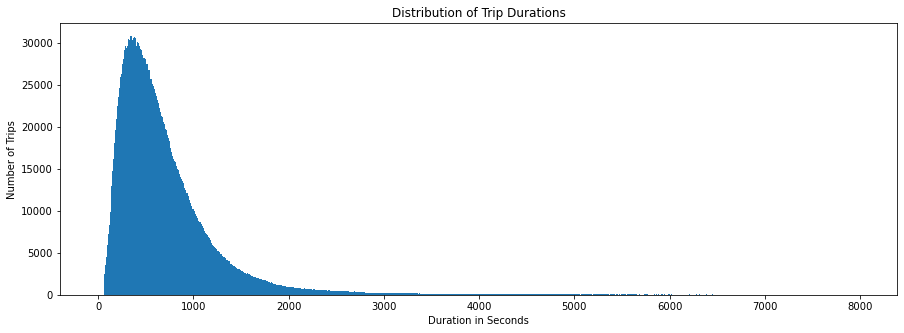

In [19]:
bins = np.arange(0, 8000, 10)
plt.figure(figsize=[15, 5])
plt.hist(data = df_master_clean, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration in Seconds')
plt.ylabel('Number of Trips')
plt.show()

- The most trips take around the 6.5 minuts mark and this distributin of duration is right skewed.

In [20]:
df_master_clean['start_station_name'].value_counts()

Market St at 10th St                                         44773
Berry St at 4th St                                           42580
San Francisco Caltrain (Townsend St at 4th St)               40151
San Francisco Ferry Building (Harry Bridges Plaza)           38721
San Francisco Caltrain Station 2  (Townsend St at 4th St)    36289
                                                             ...  
Howard workshop - Station in a Box                               3
Mercado Way at Sierra Rd                                         3
Philly Demo                                                      2
SF Test Station                                                  1
Emeryville Depot                                                 1
Name: start_station_name, Length: 444, dtype: int64

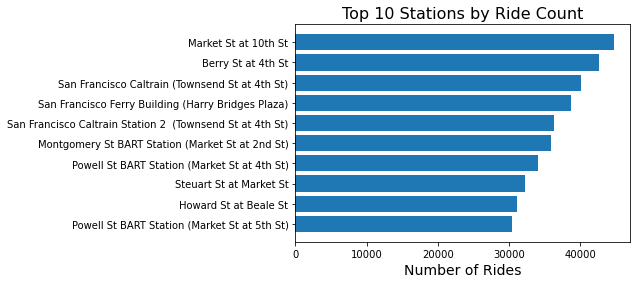

In [21]:
counts = list(df_master_clean['start_station_name'].value_counts())[0:10]
stations = df_master_clean['start_station_name'].value_counts().index.tolist()[0:10]
plt.barh(stations, counts)
plt.xlabel('Number of Rides', fontsize = 14)
plt.title('Top 10 Stations by Ride Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

- We can clearly see is the most crouded stations is Market steet and Berry street,The Powellis the less one,Market street station has the most ride count which is 44770 rides.

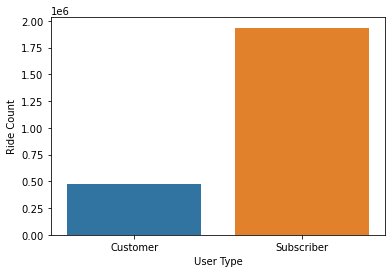

In [22]:
sb.countplot(data=df_master_clean, x='user_type');
plt.xlabel('User Type');
plt.ylabel('Ride Count');

- It's very clear here to see subscribers is the most rides fromwhich can imply that the customers is more likely to become subscribers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

**The number of rides that take place are the most, and that's expected since most of them are from subscribers. Also, most of the time, the bikes are used to reach working place from home.**

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

**The dataset is a large one which has a wide distribution. It has a duration plot which makes the distribution much clearer.**

## Bivariate Exploration

In this section,we will try to investigate the relationships between pairs of variable pairs in your data.

In [23]:
df_master_clean['start_time_day'] = df_master_clean['start_time'].dt.strftime('%a')
df_master_clean['start_time_hour'] = df_master_clean['start_time'].dt.hour

In [24]:
days = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
days_ordered = pd.api.types.CategoricalDtype(ordered = True, categories = days)
df_master_clean['start_time_day'] = df_master_clean['start_time_day'].astype(days_ordered)
df_master_clean['duration_min'] = df_master_clean['duration_sec']/60
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407907 entries, 0 to 2506660
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  bool          
 14  rental_access_method     category      
 15  start_time_day           category      
 16  start_time_hour          int64         
 17  duration_min             fl

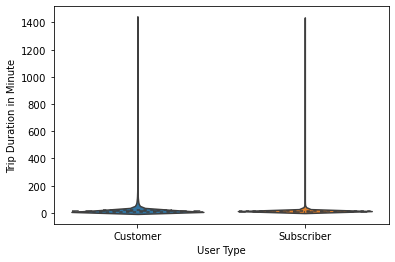

In [25]:
sb.violinplot(data=df_master_clean, x='user_type', y='duration_min', inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

- The distribution of the bikes seems to be focused on the subscribers who are paired with customers.

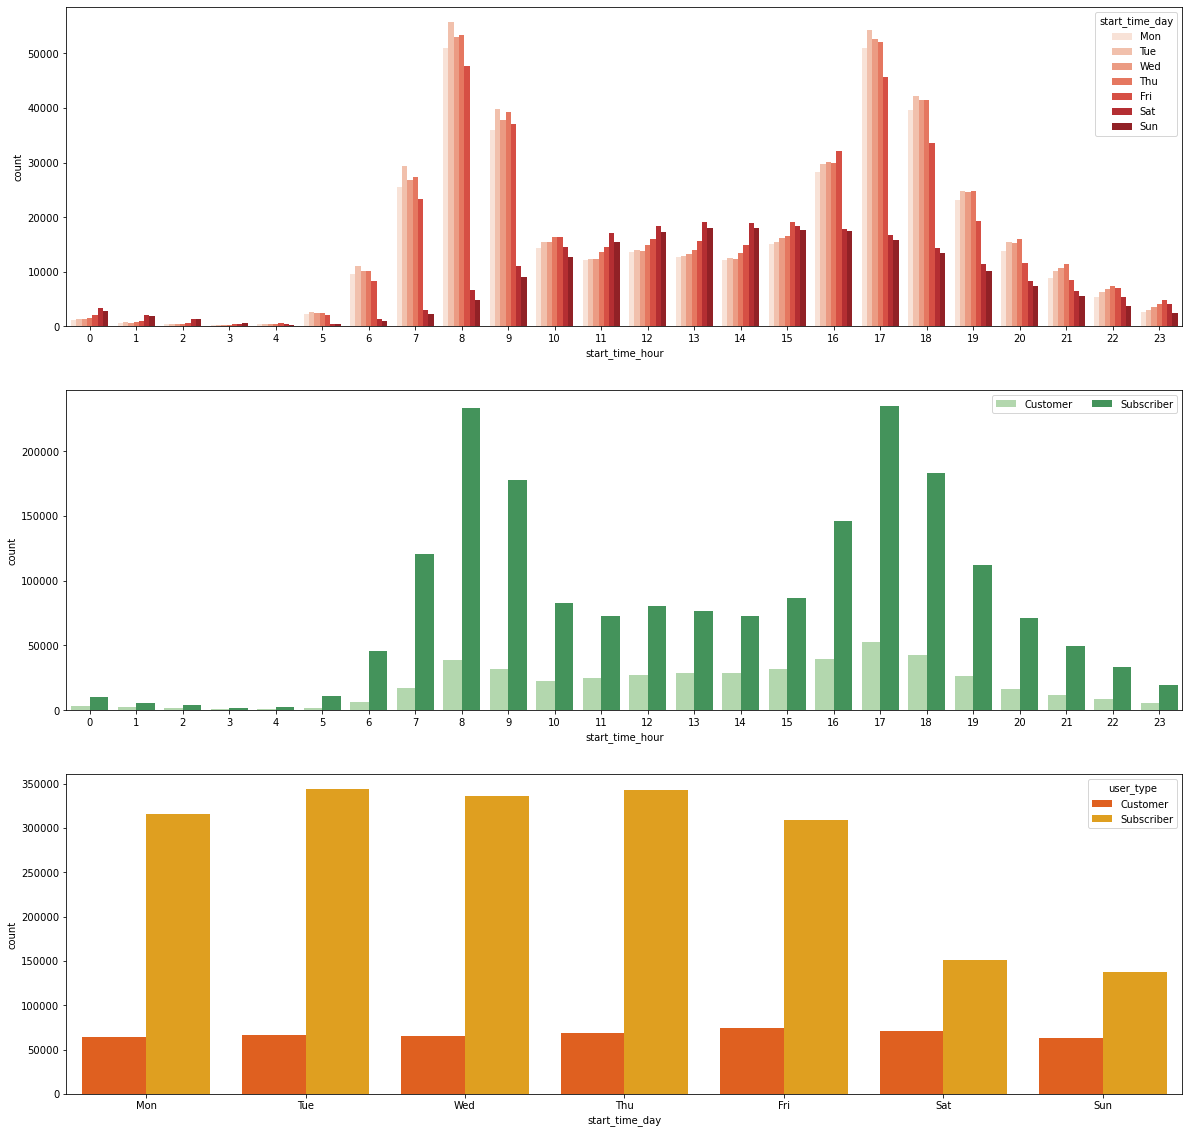

In [37]:
plt.figure(figsize = [20, 20]);
plt.subplot(3, 1, 1);
sb.countplot(data = df_master_clean, x = 'start_time_hour', hue = 'start_time_day', palette = 'Reds');

ax = plt.subplot(3, 1, 2);
sb.countplot(data = df_master_clean, x = 'start_time_hour', hue = 'user_type', palette = 'Greens');
ax.legend(loc = 1, ncol = 2);

ax = plt.subplot(3, 1, 3);
sb.countplot(data = df_master_clean, x = 'start_time_day', hue = 'user_type', palette = 'autumn');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- **The first plot** shows the relation between the number of active rides and the time of day. It shows that the most active hours are those that are usually the most visited during the week.
- **The second plot** shows the relationship between the hours and the user type. It shows that the more active the subscribers are in the 8AM and 5PM, which coincides with the times when the majority of the customers are riding.
- **The third plot** shows that the customers are less active on weekends compared to all week days.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The relationship between week days and hours showed that the users goals were more important than the number of days.

## Multivariate Exploration
Plots of multiple variables are ideal to investigate data sets. Follow the steps in the previous sections to make sure that your work is complete.

<Figure size 432x288 with 0 Axes>

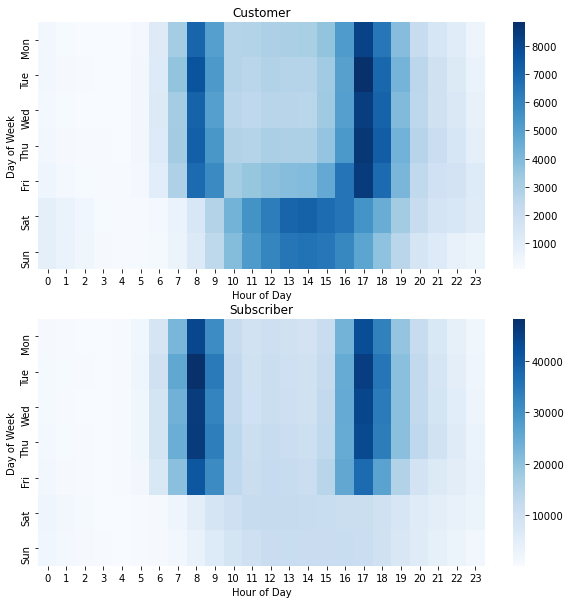

In [27]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')
plt.figure(figsize = [10, 10]);
plt.subplot(2, 1, 1)
customers = df_master_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_time_day', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_time_day', columns='start_time_hour', values='count')
sb.heatmap(ct_counts, cmap='Blues');
plt.title('Customer', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df_master_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_time_day', 'start_time_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_time_day', columns='start_time_hour', values='count')
sb.heatmap(st_counts, cmap='Blues');
plt.title('Subscriber', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

- the heatmap here is the more of a visual representation of the use of bikes between customers and subscribers. Also, as we can see the heatmap shows subscribers use bikes heavly in work days, where customers are using bikes in the afternoons.

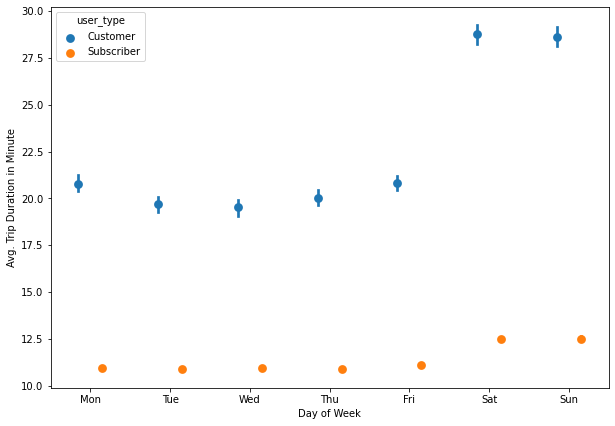

In [28]:
plt.figure(figsize = [10, 7]);
sb.pointplot(data=df_master_clean, x='start_time_day', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

> **Observation:** The plot above shows that both user types have an increased duration on the weekends. The plot also shows that the customers spend more time using the bike than subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Multivariate observations clearly strengthen the observation in general, because it's has a very strong ralationships and shows how the data is connected. To be able to connect many parts of the data set in one observation surely will make this observation much stronger and more convenient. The previous multivariate observations strengthened the bivariate observations and showed more visual representation. Also showed a new observation which is both user type have an increased duration on the weekends.

### Were there any interesting or surprising interactions between features?
As we mentioned previously, connecting many parts of the dataset will shows how connected and strong is the dataset and in the last section we were able to connect many parts of the dataset in different ways and came up with strong visuals and new intersting observation.

In [29]:
df_master_clean.to_csv('ford_gobike_master_clean.csv', index=False)